In [1]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt

## London Crime Clustering

In [4]:
crime23_25 = pd.read_csv('./data/MPS LSOA Level Crime (most recent 24 months).csv')
crime23_25.head()

LSOA Code                  LSOA Name    Borough             Major Category  \
0  E01000006  Barking and Dagenham 016A  E09000002  ARSON AND CRIMINAL DAMAGE   
1  E01000006  Barking and Dagenham 016A  E09000002                   BURGLARY   
2  E01000006  Barking and Dagenham 016A  E09000002                   BURGLARY   
3  E01000006  Barking and Dagenham 016A  E09000002              DRUG OFFENCES   
4  E01000006  Barking and Dagenham 016A  E09000002              DRUG OFFENCES   

           Minor Category  202302  202303  202304  202305  202306  ...  \
0         CRIMINAL DAMAGE       0       1       1       0       0  ...   
1  BURGLARY - RESIDENTIAL       0       0       0       0       0  ...   
2  BURGLARY IN A DWELLING       0       0       1       0       0  ...   
3     POSSESSION OF DRUGS       0       0       0       0       1  ...   
4    TRAFFICKING OF DRUGS       0       0       1       0       1  ...   

   202405  202406  202407  202408  202409  202410  202411  202412  202501  \
0       1       0       0       0       0       0       2       0       1   
1       0       0       0       1       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       1       0       0   
4       0       0       0       0       0       0       1       0       0   

   Refreshed Date  
0      05/02/2025  
1      05/02/2025  
2      05/02/2025  
3      05/02/2025  
4      05/02/2025  

[5 rows x 30 columns]

In [5]:
crime23_25.describe()

202302         202303         202304         202305  \
count  100797.000000  100797.000000  100797.000000  100797.000000   
mean        0.652113       0.709634       0.675834       0.747433   
std         3.628480       3.417756       3.157013       3.359621   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max       492.000000     409.000000     411.000000     411.000000   

              202306         202307         202308         202309  \
count  100797.000000  100797.000000  100797.000000  100797.000000   
mean        0.765866       0.763306       0.729615       0.737076   
std         3.506439       3.496909       2.965473       2.955468   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max       437.000000     426.000000     309.000000     317.000000   

              202310         202311  ...         202404         202405  \
count  100797.000000  100797.000000  ...  100797.000000  100797.000000   
mean        0.720398       0.758941  ...       0.691221       0.725478   
std         3.680320       5.308795  ...       3.876519       3.339009   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       1.000000   
max       512.000000     972.000000  ...     680.000000     482.000000   

              202406         202407         202408        202409  \
count  100797.000000  100797.000000  100797.000000  100797.00000   
mean        0.718692       0.744268       0.724079       0.71641   
std         3.489100       3.536082       3.106277       3.22634   
min         0.000000       0.000000       0.000000       0.00000   
25%         0.000000       0.000000       0.000000       0.00000   
50%         0.000000       0.000000       0.000000       0.00000   
75%         1.000000       1.000000       1.000000       1.00000   
max       526.000000     516.000000     323.000000     362.00000   

              202410         202411         202412         202501  
count  100797.000000  100797.000000  100797.000000  100797.000000  
mean        0.769428       0.761292       0.718513       0.678869  
std         4.384896       5.514419       5.648035       4.086395  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         1.000000       1.000000       1.000000       1.000000  
max       620.000000     950.000000    1147.000000     623.000000  

[8 rows x 24 columns]

In [7]:
crime23_25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100797 entries, 0 to 100796
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   LSOA Code       100797 non-null  object
 1   LSOA Name       100797 non-null  object
 2   Borough         100797 non-null  object
 3   Major Category  100797 non-null  object
 4   Minor Category  100797 non-null  object
 5   202302          100797 non-null  int64 
 6   202303          100797 non-null  int64 
 7   202304          100797 non-null  int64 
 8   202305          100797 non-null  int64 
 9   202306          100797 non-null  int64 
 10  202307          100797 non-null  int64 
 11  202308          100797 non-null  int64 
 12  202309          100797 non-null  int64 
 13  202310          100797 non-null  int64 
 14  202311          100797 non-null  int64 
 15  202312          100797 non-null  int64 
 16  202401          100797 non-null  int64 
 17  202402          100797 non-nu

After inspection we can take away three things:
1. Firstly, there are 100797 observations that are all non-null. This means that data cleanup should be relatively easily.
2. The data is split into months for 2023 and 2024. This means we could take a look at individual months in terms of crime data, or if we want to look at a singel year then the data would have to be aggregated.
3. There are major types of crime and minor types of crime. These minor types of crime are subsets of each major type of crime category.



In [9]:
major_cats = crime23_25['Major Category'].unique()
minor_cats = crime23_25['Minor Category'].unique()
print(major_cats)
print(minor_cats)

['ARSON AND CRIMINAL DAMAGE' 'BURGLARY' 'DRUG OFFENCES'
 'MISCELLANEOUS CRIMES AGAINST SOCIETY' 'POSSESSION OF WEAPONS'
 'PUBLIC ORDER OFFENCES' 'ROBBERY' 'THEFT' 'VEHICLE OFFENCES'
 'VIOLENCE AGAINST THE PERSON']
['CRIMINAL DAMAGE' 'BURGLARY - RESIDENTIAL' 'BURGLARY IN A DWELLING'
 'POSSESSION OF DRUGS' 'TRAFFICKING OF DRUGS'
 'MISC CRIMES AGAINST SOCIETY' 'POSSESSION OF WEAPONS'
 'OTHER OFFENCES PUBLIC ORDER' 'PUBLIC FEAR ALARM OR DISTRESS'
 'RACE OR RELIGIOUS AGG PUBLIC FEAR' 'ROBBERY OF PERSONAL PROPERTY'
 'OTHER THEFT' 'THEFT FROM THE PERSON' 'INTERFERING WITH A MOTOR VEHICLE'
 'THEFT FROM A VEHICLE' 'THEFT OR UNAUTH TAKING OF A MOTOR VEH'
 'VIOLENCE WITH INJURY' 'VIOLENCE WITHOUT INJURY' 'ARSON'
 'BURGLARY BUSINESS AND COMMUNITY' 'ROBBERY OF BUSINESS PROPERTY'
 'BICYCLE THEFT' 'SHOPLIFTING' 'VIOLENT DISORDER' 'HOMICIDE'
 'AGGRAVATED VEHICLE TAKING' 'BURGLARY NON-DWELLING']


In [14]:
crime_type = crime23_25.groupby(['Major Category', 'Minor Category']).size()
crime_type

Major Category                        Minor Category                       
ARSON AND CRIMINAL DAMAGE             ARSON                                    2261
                                      CRIMINAL DAMAGE                          4983
BURGLARY                              BURGLARY - RESIDENTIAL                   4892
                                      BURGLARY BUSINESS AND COMMUNITY          4123
                                      BURGLARY IN A DWELLING                   4936
                                      BURGLARY NON-DWELLING                      70
DRUG OFFENCES                         POSSESSION OF DRUGS                      4656
                                      TRAFFICKING OF DRUGS                     4467
MISCELLANEOUS CRIMES AGAINST SOCIETY  MISC CRIMES AGAINST SOCIETY              4512
POSSESSION OF WEAPONS                 POSSESSION OF WEAPONS                    3578
PUBLIC ORDER OFFENCES                 OTHER OFFENCES PUBLIC ORDER              3901


What this shows is that there are a large number of minor crimes, while there is only 10 major crime categories. these minor crimes are also specific subsets of each major crime (there appears no overlap in minor catgeries within each major category). 

the focus of this is on the Major categories as that is what we are interested in and should lead to greater intepretability.

In [15]:
cols_to_sum_23 = [col for col in crime23_25.columns if '2023' in str(col)]
cols_to_sum_24 = [col for col in crime23_25.columns if '2024' in str(col)]

crime23_25['2023'] = crime23_25[cols_to_sum_23].sum(axis=1)
crime23_25['2024'] = crime23_25[cols_to_sum_24].sum(axis=1)

crime23_25

LSOA Code                  LSOA Name    Borough  \
0       E01000006  Barking and Dagenham 016A  E09000002   
1       E01000006  Barking and Dagenham 016A  E09000002   
2       E01000006  Barking and Dagenham 016A  E09000002   
3       E01000006  Barking and Dagenham 016A  E09000002   
4       E01000006  Barking and Dagenham 016A  E09000002   
...           ...                        ...        ...   
100792  E01035722           Westminster 024G  E09000033   
100793  E01035722           Westminster 024G  E09000033   
100794  E01035722           Westminster 024G  E09000033   
100795  E01035722           Westminster 024G  E09000033   
100796  E01035722           Westminster 024G  E09000033   

                     Major Category                         Minor Category  \
0         ARSON AND CRIMINAL DAMAGE                        CRIMINAL DAMAGE   
1                          BURGLARY                 BURGLARY - RESIDENTIAL   
2                          BURGLARY                 BURGLARY IN A DWELLING   
3                     DRUG OFFENCES                    POSSESSION OF DRUGS   
4                     DRUG OFFENCES                   TRAFFICKING OF DRUGS   
...                             ...                                    ...   
100792                        THEFT                  THEFT FROM THE PERSON   
100793             VEHICLE OFFENCES                   THEFT FROM A VEHICLE   
100794             VEHICLE OFFENCES  THEFT OR UNAUTH TAKING OF A MOTOR VEH   
100795  VIOLENCE AGAINST THE PERSON                   VIOLENCE WITH INJURY   
100796  VIOLENCE AGAINST THE PERSON                VIOLENCE WITHOUT INJURY   

        202302  202303  202304  202305  202306  ...  202407  202408  202409  \
0            0       1       1       0       0  ...       0       0       0   
1            0       0       0       0       0  ...       0       1       0   
2            0       0       1       0       0  ...       0       0       0   
3            0       0       0       0       1  ...       0       0       0   
4            0       0       1       0       1  ...       0       0       0   
...        ...     ...     ...     ...     ...  ...     ...     ...     ...   
100792       0       0       1       1       0  ...       1       1       3   
100793       0       0       0       1       0  ...       0       1       0   
100794       1       0       0       0       0  ...       1       0       0   
100795       0       3       2       1       0  ...       0       0       0   
100796       0       3       4       1       2  ...       2       2       0   

        202410  202411  202412  202501  Refreshed Date  2023  2024  
0            0       2       0       1      05/02/2025     5     5  
1            0       0       0       0      05/02/2025     0     2  
2            0       0       0       0      05/02/2025     3     0  
3            0       1       0       0      05/02/2025     3     2  
4            0       1       0       0      05/02/2025     2     1  
...        ...     ...     ...     ...             ...   ...   ...  
100792       1       3       1       0      05/02/2025     5    15  
100793       0       0       0       0      05/02/2025     6     1  
100794       0       1       0       2      05/02/2025     2     5  
100795       2       1       0       0      05/02/2025    12     9  
100796       0       2       4       4      05/02/2025    26    24  

[100797 rows x 32 columns]

In [18]:
crime23_25[["LSOA Code", "Major Category", "2023", "2024"]]

LSOA Code               Major Category  2023  2024
0       E01000006    ARSON AND CRIMINAL DAMAGE     5     5
1       E01000006                     BURGLARY     0     2
2       E01000006                     BURGLARY     3     0
3       E01000006                DRUG OFFENCES     3     2
4       E01000006                DRUG OFFENCES     2     1
...           ...                          ...   ...   ...
100792  E01035722                        THEFT     5    15
100793  E01035722             VEHICLE OFFENCES     6     1
100794  E01035722             VEHICLE OFFENCES     2     5
100795  E01035722  VIOLENCE AGAINST THE PERSON    12     9
100796  E01035722  VIOLENCE AGAINST THE PERSON    26    24

[100797 rows x 4 columns]

In [35]:
crime23 = crime23_25[["LSOA Code", "Major Category", "2023"]]
crime24 = crime23_25[["LSOA Code", "Major Category", "2024"]]
crime23

LSOA Code               Major Category  2023
0       E01000006    ARSON AND CRIMINAL DAMAGE     5
1       E01000006                     BURGLARY     0
2       E01000006                     BURGLARY     3
3       E01000006                DRUG OFFENCES     3
4       E01000006                DRUG OFFENCES     2
...           ...                          ...   ...
100792  E01035722                        THEFT     5
100793  E01035722             VEHICLE OFFENCES     6
100794  E01035722             VEHICLE OFFENCES     2
100795  E01035722  VIOLENCE AGAINST THE PERSON    12
100796  E01035722  VIOLENCE AGAINST THE PERSON    26

[100797 rows x 3 columns]

In [ ]:
# crime11 = pd.read_csv('./data/MPS LSOA Level Crime (Historical).csv')
# cols_to_sum_11 = [col for col in crime11.columns if "2011" in str(col)]
# crime11["2011"] = crime11[cols_to_sum_11].sum(axis = 1)
# crime11 = crime11[["LSOA Code", "Major Category", "2011"]]
# crime11 = crime11.pivot_table(index= 'LSOA Code', columns = 'Major Category', 
#                                     values = "2011", aggfunc = np.sum,
#                                     fill_value = 0).reset_index()
# #then rename the axis
# crime11.rename_axis(None,axis=1, inplace=True)
# cols_to_sum = [col for col in crime11.columns if "LSOA" not in col]
# #sum across the columns rather than rows
# crime11["Total_crime"] = crime11[cols_to_sum].sum(axis=1)
# for col in cols_to_sum:
#     crime11[col] = crime11[col]/crime11["Total_crime"]
# crime11

C:\Users\YU\AppData\Local\Temp\ipykernel_38532\1670676509.py:5: FutureWarning: The provided callable <function sum at 0x000001A51EA51940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime11 = crime11.pivot_table(index= 'LSOA Code', columns = 'Major Category',


LSOA Code  ARSON AND CRIMINAL DAMAGE  BURGLARY  DRUG OFFENCES  \
0     E01000006                   0.037383  0.186916       0.093458   
1     E01000007                   0.099256  0.034739       0.129032   
2     E01000008                   0.084270  0.073034       0.106742   
3     E01000009                   0.103858  0.068249       0.163205   
4     E01000011                   0.123894  0.106195       0.106195   
...         ...                        ...       ...            ...   
4983  E01035718                   0.027159  0.034123       0.191504   
4984  E01035719                   0.128440  0.073394       0.027523   
4985  E01035720                   0.093023  0.023256       0.081395   
4986  E01035721                   0.043695  0.016230       0.441948   
4987  E01035722                   0.093220  0.118644       0.033898   

      MISCELLANEOUS CRIMES AGAINST SOCIETY  POSSESSION OF WEAPONS  \
0                                 0.000000               0.000000   
1                                 0.009926               0.014888   
2                                 0.033708               0.005618   
3                                 0.008902               0.005935   
4                                 0.008850               0.000000   
...                                    ...                    ...   
4983                              0.004875               0.002786   
4984                              0.000000               0.000000   
4985                              0.000000               0.011628   
4986                              0.008739               0.013733   
4987                              0.008475               0.016949   

      PUBLIC ORDER OFFENCES   ROBBERY     THEFT  VEHICLE OFFENCES  \
0                  0.037383  0.084112  0.112150          0.289720   
1                  0.034739  0.074442  0.233251          0.091811   
2                  0.022472  0.061798  0.207865          0.224719   
3                  0.014837  0.086053  0.169139          0.118694   
4                  0.008850  0.079646  0.141593          0.176991   
...                     ...       ...       ...               ...   
4983               0.011838  0.029248  0.557103          0.041086   
4984               0.018349  0.000000  0.532110          0.073394   
4985               0.011628  0.034884  0.616279          0.034884   
4986               0.024969  0.009988  0.324594          0.021223   
4987               0.008475  0.076271  0.338983          0.110169   

      VIOLENCE AGAINST THE PERSON  Total_crime  
0                        0.158879          107  
1                        0.277916          403  
2                        0.179775          178  
3                        0.261128          337  
4                        0.247788          113  
...                           ...          ...  
4983                     0.100279         1436  
4984                     0.146789          109  
4985                     0.093023           86  
4986                     0.094881          801  
4987                     0.194915          118  

[4988 rows x 12 columns]

In [ ]:
#use the pivot table function, set index to LSOA, column names to be the major categories, and values from the 2019 column
#we want to agg by the sum and we want to fill any empty values with a zero
crime23 = crime23.pivot_table(index= 'LSOA Code', columns = 'Major Category', 
                                    values = "2023", aggfunc = np.sum,
                                    fill_value = 0).reset_index()
#then rename the axis
crime23.rename_axis(None, axis=1, inplace=True)
crime23

C:\Users\YU\AppData\Local\Temp\ipykernel_34576\4022639650.py:3: FutureWarning: The provided callable <function sum at 0x000001D2E882DD00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime23 = crime23.pivot_table(index= 'LSOA Code', columns = 'Major Category',


LSOA Code  ARSON AND CRIMINAL DAMAGE  BURGLARY  DRUG OFFENCES  \
0     E01000006                          5         3              5   
1     E01000007                         31        23             98   
2     E01000008                         23        13             23   
3     E01000009                         26        15             70   
4     E01000011                          2         5             10   
...         ...                        ...       ...            ...   
4983  E01035718                         44        34            116   
4984  E01035719                          5         7              2   
4985  E01035720                          6         7              1   
4986  E01035721                         25        20             35   
4987  E01035722                          8         9              7   

      MISCELLANEOUS CRIMES AGAINST SOCIETY  POSSESSION OF WEAPONS  \
0                                        1                      0   
1                                        1                      6   
2                                        2                      3   
3                                        3                      8   
4                                        0                      1   
...                                    ...                    ...   
4983                                    10                      4   
4984                                     1                      1   
4985                                     0                      0   
4986                                     6                      4   
4987                                     0                      0   

      PUBLIC ORDER OFFENCES  ROBBERY  THEFT  VEHICLE OFFENCES  \
0                         6        2     12                12   
1                        49       35    161                27   
2                         7       10     39                44   
3                        20       23     63                18   
4                         3        6     12                 9   
...                     ...      ...    ...               ...   
4983                     61       66    738               210   
4984                      2        2     19                 4   
4985                      6        5     21                 1   
4986                     45       13    368                16   
4987                     17        5     34                 8   

      VIOLENCE AGAINST THE PERSON  
0                              35  
1                             184  
2                              54  
3                             104  
4                              64  
...                           ...  
4983                          244  
4984                           17  
4985                           30  
4986                          112  
4987                           38  

[4988 rows x 11 columns]

In [37]:
#extract the columns to sum
cols_to_sum = [col for col in crime23.columns if "LSOA" not in col]
print(cols_to_sum)
#sum across the columns rather than rows
crime23["Total_crime"] = crime23[cols_to_sum].sum(axis=1)

['ARSON AND CRIMINAL DAMAGE', 'BURGLARY', 'DRUG OFFENCES', 'MISCELLANEOUS CRIMES AGAINST SOCIETY', 'POSSESSION OF WEAPONS', 'PUBLIC ORDER OFFENCES', 'ROBBERY', 'THEFT', 'VEHICLE OFFENCES', 'VIOLENCE AGAINST THE PERSON']


In [38]:
#we then want to turn the previous columns into percentages
#do this by dividing over the total crime columns
for col in cols_to_sum:
    crime23[col] = (crime23[col] / crime23["Total_crime"]).round(4)

In [39]:
crime23

LSOA Code  ARSON AND CRIMINAL DAMAGE  BURGLARY  DRUG OFFENCES  \
0     E01000006                     0.0617    0.0370         0.0617   
1     E01000007                     0.0504    0.0374         0.1593   
2     E01000008                     0.1055    0.0596         0.1055   
3     E01000009                     0.0743    0.0429         0.2000   
4     E01000011                     0.0179    0.0446         0.0893   
...         ...                        ...       ...            ...   
4983  E01035718                     0.0288    0.0223         0.0760   
4984  E01035719                     0.0833    0.1167         0.0333   
4985  E01035720                     0.0779    0.0909         0.0130   
4986  E01035721                     0.0388    0.0311         0.0543   
4987  E01035722                     0.0635    0.0714         0.0556   

      MISCELLANEOUS CRIMES AGAINST SOCIETY  POSSESSION OF WEAPONS  \
0                                   0.0123                 0.0000   
1                                   0.0016                 0.0098   
2                                   0.0092                 0.0138   
3                                   0.0086                 0.0229   
4                                   0.0000                 0.0089   
...                                    ...                    ...   
4983                                0.0065                 0.0026   
4984                                0.0167                 0.0167   
4985                                0.0000                 0.0000   
4986                                0.0093                 0.0062   
4987                                0.0000                 0.0000   

      PUBLIC ORDER OFFENCES  ROBBERY   THEFT  VEHICLE OFFENCES  \
0                    0.0741   0.0247  0.1481            0.1481   
1                    0.0797   0.0569  0.2618            0.0439   
2                    0.0321   0.0459  0.1789            0.2018   
3                    0.0571   0.0657  0.1800            0.0514   
4                    0.0268   0.0536  0.1071            0.0804   
...                     ...      ...     ...               ...   
4983                 0.0399   0.0432  0.4833            0.1375   
4984                 0.0333   0.0333  0.3167            0.0667   
4985                 0.0779   0.0649  0.2727            0.0130   
4986                 0.0699   0.0202  0.5714            0.0248   
4987                 0.1349   0.0397  0.2698            0.0635   

      VIOLENCE AGAINST THE PERSON  Total_crime  
0                          0.4321           81  
1                          0.2992          615  
2                          0.2477          218  
3                          0.2971          350  
4                          0.5714          112  
...                           ...          ...  
4983                       0.1598         1527  
4984                       0.2833           60  
4985                       0.3896           77  
4986                       0.1739          644  
4987                       0.3016          126  

[4988 rows x 12 columns]

In [40]:
crime23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   LSOA Code                             4988 non-null   object 
 1   ARSON AND CRIMINAL DAMAGE             4988 non-null   float64
 2   BURGLARY                              4988 non-null   float64
 3   DRUG OFFENCES                         4988 non-null   float64
 4   MISCELLANEOUS CRIMES AGAINST SOCIETY  4988 non-null   float64
 5   POSSESSION OF WEAPONS                 4988 non-null   float64
 6   PUBLIC ORDER OFFENCES                 4988 non-null   float64
 7   ROBBERY                               4988 non-null   float64
 8   THEFT                                 4988 non-null   float64
 9   VEHICLE OFFENCES                      4988 non-null   float64
 10  VIOLENCE AGAINST THE PERSON           4988 non-null   float64
 11  Total_crime      

In [68]:
#load in the LSOA map 
UK_LSOA = gpd.read_file("./data/LSOA.gpkg")
UK_LSOA = UK_LSOA[["lsoa21cd", "geometry"]]

In [69]:
london_crime23 = UK_LSOA.merge(crime23, left_on="lsoa21cd", right_on="LSOA Code", how="right")

In [70]:
london_crime23.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   lsoa21cd                              4988 non-null   object  
 1   geometry                              4988 non-null   geometry
 2   LSOA Code                             4988 non-null   object  
 3   ARSON AND CRIMINAL DAMAGE             4988 non-null   float64 
 4   BURGLARY                              4988 non-null   float64 
 5   DRUG OFFENCES                         4988 non-null   float64 
 6   MISCELLANEOUS CRIMES AGAINST SOCIETY  4988 non-null   float64 
 7   POSSESSION OF WEAPONS                 4988 non-null   float64 
 8   PUBLIC ORDER OFFENCES                 4988 non-null   float64 
 9   ROBBERY                               4988 non-null   float64 
 10  THEFT                                 4988 non-null   float64 
 

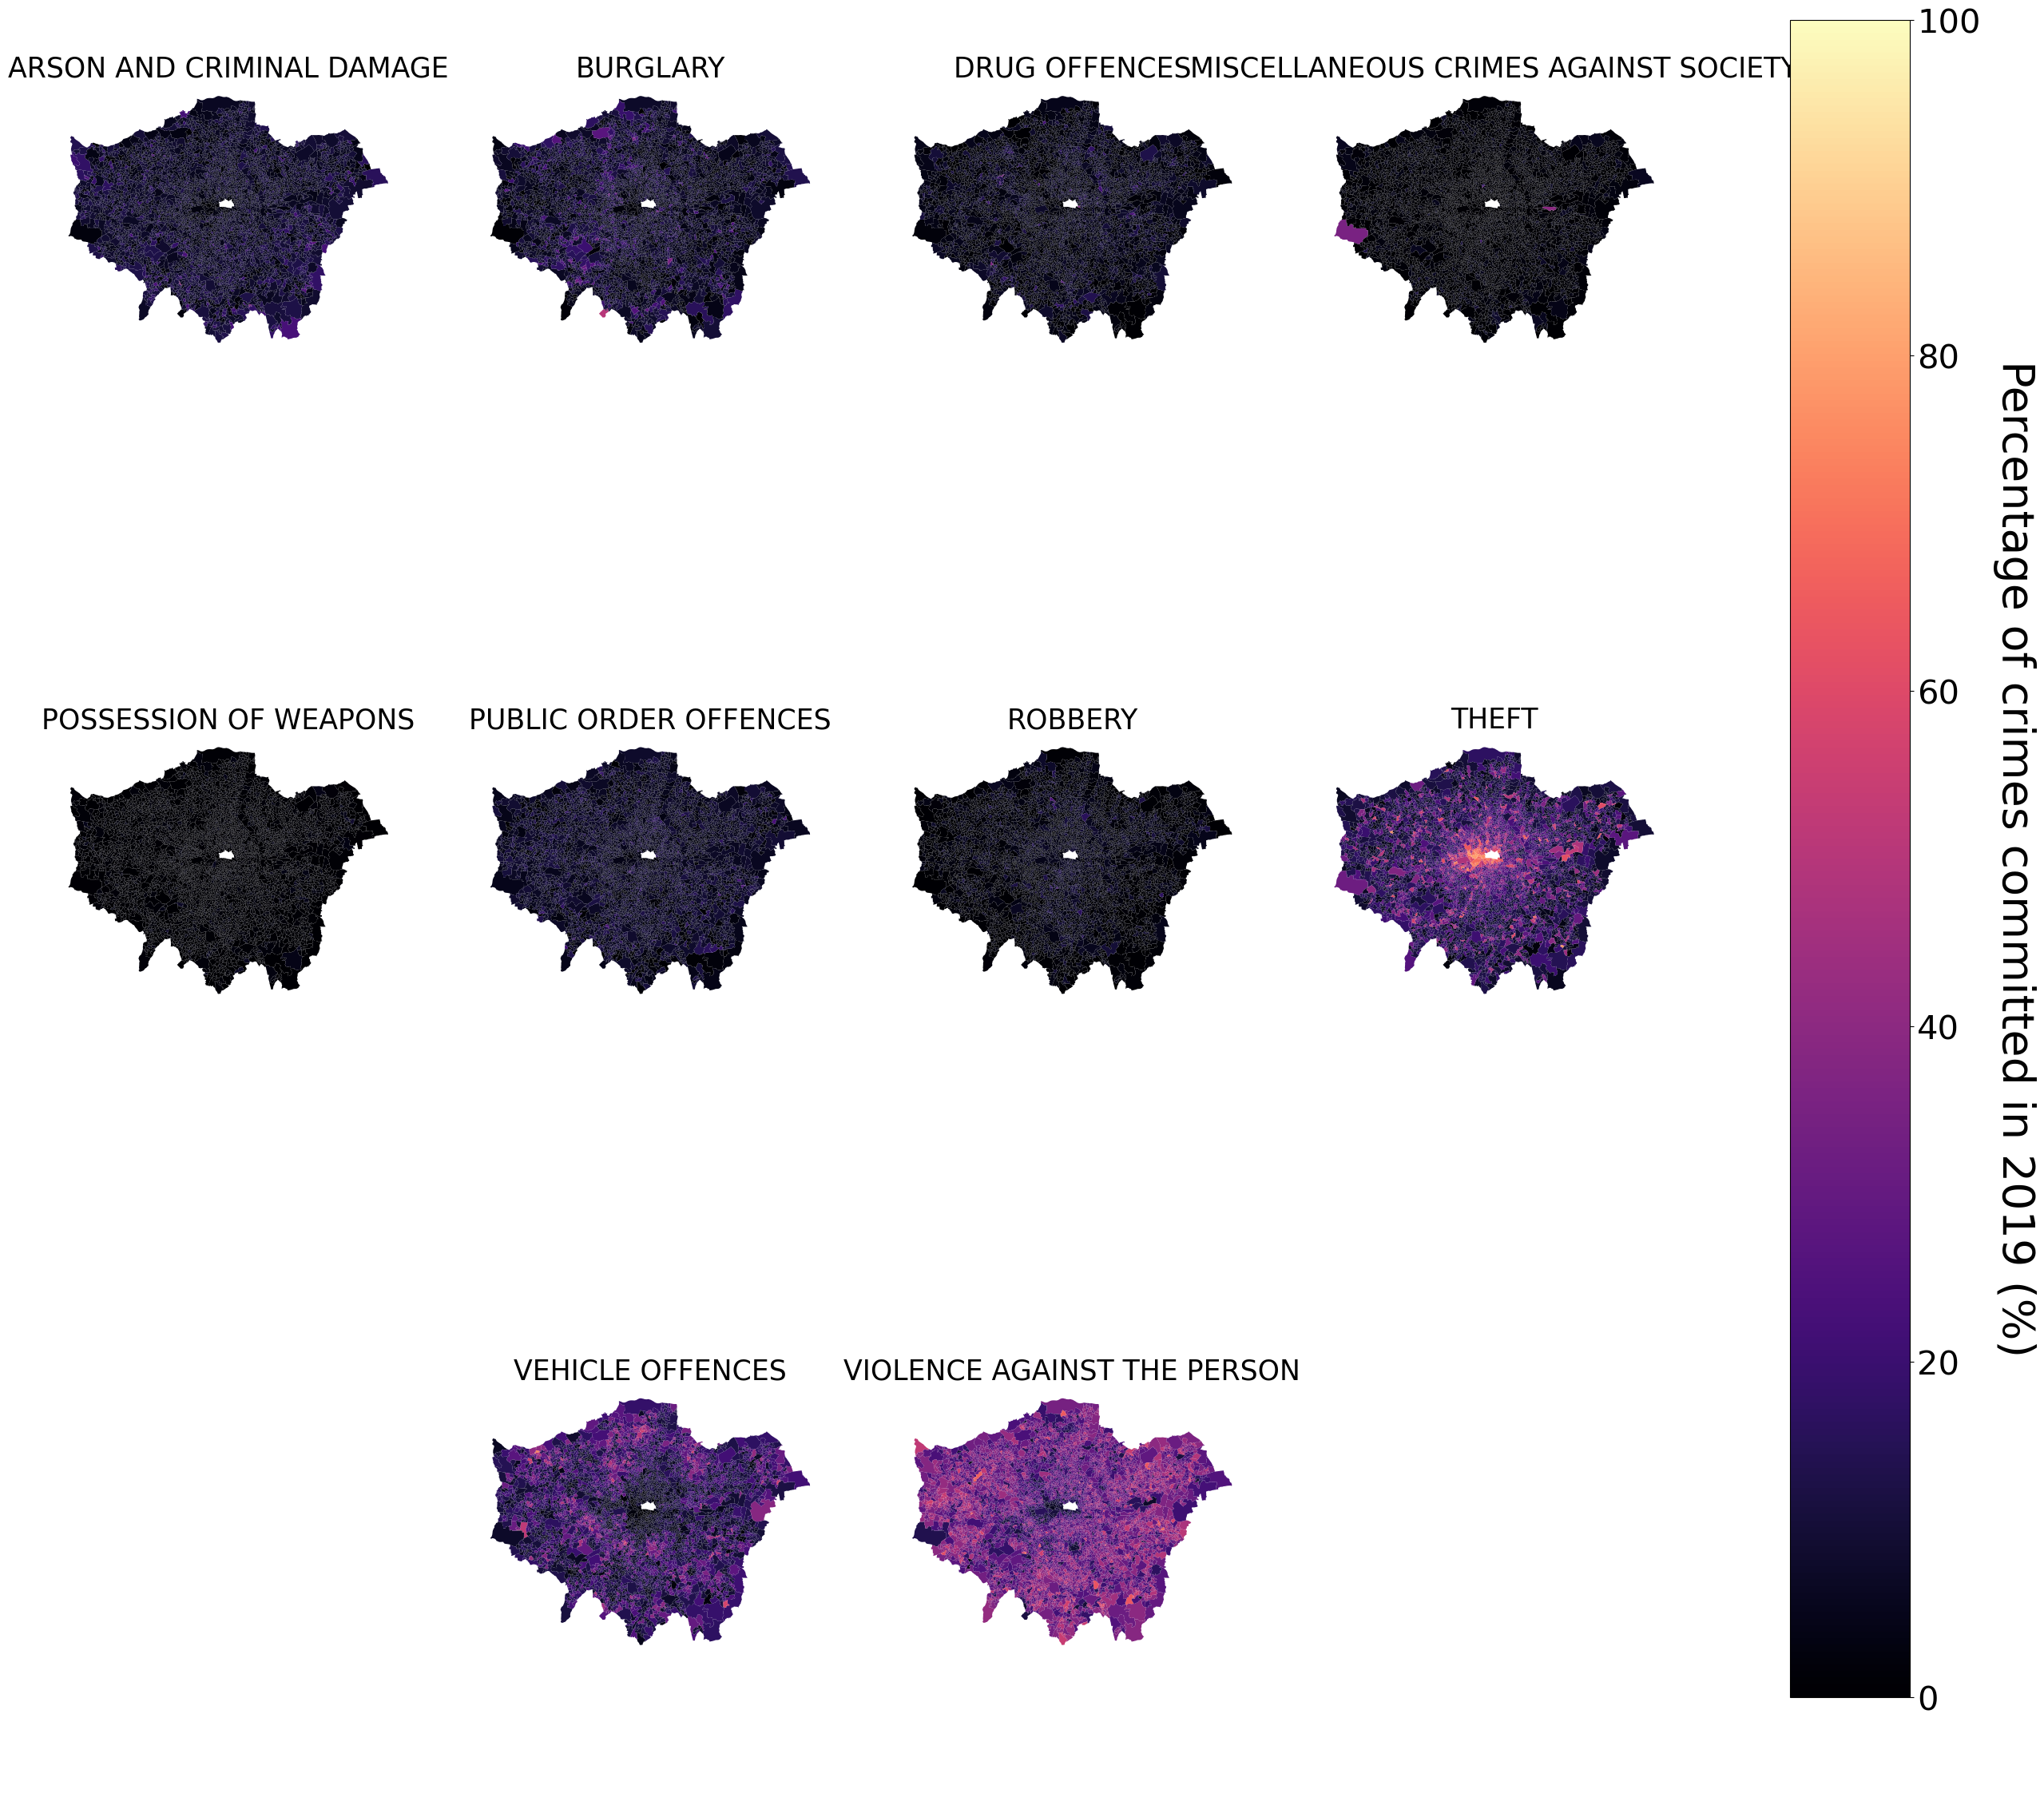

In [72]:
not_plot = ["lsoa21cd", "geometry", "LSOA Code", "Total_crime"]
to_plot = [col for col in london_crime23 if col not in not_plot]

fig, axis = plt.subplots(3,4,figsize=(30,30))
#flatten the axis so that we can iterate over them
axis = axis.flatten()

for i, col in enumerate(to_plot):
    #set the axis as in the rows
    ax = axis[i]
    #to make it cleaner move two axis across
    if i >=8:
        ax = axis[i+1]
    #plot the crime map using the magma color map
    crim_plt = london_crime23.plot(column = col, ax=ax, cmap = "magma", vmin =0, vmax = 1)
    #remove the axis so that it looks cleaner
    ax.set_axis_off()
    #set the plot title as the column name
    ax.set_title(col, fontsize = 25)

vmin, vmax = 0, 100
#create a subaxis within the figure
fig = ax.get_figure()
plt.subplots_adjust(right = 0.8)
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7], label = "Percentage of crime")
#create a colorbar and plot it
sm = plt.cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cb = fig.colorbar(sm, cax=cax)
#change the size of the tick parameters
cb.ax.tick_params(labelsize = 30)
#set the label title
#https://stackoverflow.com/questions/17475619/how-do-i-adjust-offset-colorbar-title-in-matplotlib
cb.set_label("Percentage of crimes committed in 2019 (%)", rotation = 270, fontsize= 40, labelpad = 50)
#
#cax.tight_layout()

#remove axis of plots not covered
axis[8].set_axis_off()
axis[11].set_axis_off()
#show the results
plt.show()

What this plot tells us is that four main categories of: Bulgrary, Theft, Vehcile Offences and Violence against the person appear to have the greatest variance in values and also the larget values in terms of percentages. What this could mean is that the clustering algorithm may be likely to focus on these four factors because of this.

In [ ]:
#import the necessary module
from sklearn.cluster import AgglomerativeClustering
#extract the values that we want to plot
crime_clus = london_crime23[to_plot]
#create the model that we want, setting the linkage to ward, the distance threshold to 4 and 
#set the number of clusters to none so that we can plot the dendrogram afterwards
model = AgglomerativeClustering(linkage="ward", distance_threshold = 5, n_clusters=None)
# 这行代码创建了一个 AgglomerativeClustering 模型。
# 参数 linkage="ward" 指定了使用 Ward 方法进行聚类，
# distance_threshold=5 设置了聚类的距离阈值为 5，
# n_clusters=None 表示不预先指定聚类的数量，
# 以便后续绘制树状图。

#fit the model to the data
model.fit(crime_clus)

#将聚类结果添加到原数据集
london_crime23["Aggl_clus"] = model.labels_

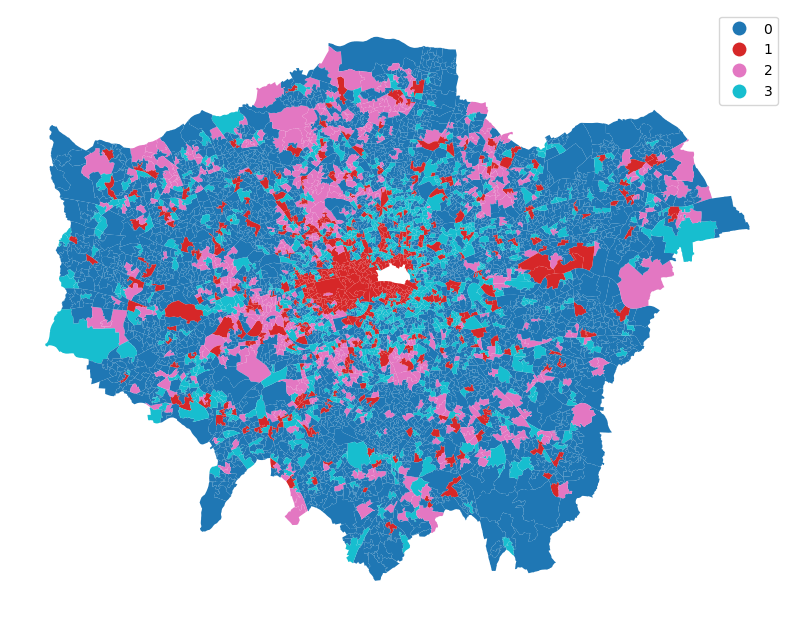

In [79]:
fig, ax = plt.subplots(figsize = (10,10))

#colors = ["red", "blue", "green", "pink"]

#color_map = {0: "red", 1: "blue", 2:"green", 3: "pink"}

#Aggl_colors = London_crime["Aggl_clus"].map(color_map)

london_crime23.plot(column = "Aggl_clus", categorical = True, legend=True, ax=ax)

ax.set_axis_off()

What we can see here is that with the distance threshold set to 4 we get 4 clusters which are distributed across London. What is appears like from this inspection is that clsuter 1 is dominant in the centre of London but there are small patches across the rest of London. Cluster 0, 2 and 3 tend to be randomly distributed across London.

What we need to know next then is what do these clusters mean and how do they compare to each other in terms of the percenatges of crime between each cluster. This can be done by visualising the means of each of these clusters (although the distribution of clusters could also be used) which would allow us to assign labels to interpret each of these clusters:

In [91]:
agglom_means =london_crime23.groupby("Aggl_clus")[to_plot].mean()
agglom_means

ARSON AND CRIMINAL DAMAGE  BURGLARY  DRUG OFFENCES  \
Aggl_clus                                                       
0                           0.087403  0.074025       0.047836   
1                           0.046895  0.064751       0.028794   
2                           0.068206  0.109745       0.032473   
3                           0.068508  0.081821       0.045001   

           MISCELLANEOUS CRIMES AGAINST SOCIETY  POSSESSION OF WEAPONS  \
Aggl_clus                                                                
0                                      0.015835               0.008308   
1                                      0.006523               0.004713   
2                                      0.012277               0.005414   
3                                      0.011821               0.007455   

           PUBLIC ORDER OFFENCES   ROBBERY     THEFT  VEHICLE OFFENCES  \
Aggl_clus                                                                
0                       0.070381  0.027407  0.137747          0.151588   
1                       0.056508  0.041071  0.474417          0.098555   
2                       0.051711  0.025783  0.147342          0.323615   
3                       0.076296  0.040597  0.288950          0.101134   

           VIOLENCE AGAINST THE PERSON  
Aggl_clus                               
0                             0.379467  
1                             0.177773  
2                             0.223423  
3                             0.278414

In [92]:
# DataFrame 转置（即行列互换），然后对所有数值保留三位小数。
agglom_means_T = agglom_means.T.round(3)
#agglom_means_T.reset_index(inplace=True)
agglom_means_T = pd.DataFrame(agglom_means_T)
agglom_means_T

Aggl_clus                                 0      1      2      3
ARSON AND CRIMINAL DAMAGE             0.087  0.047  0.068  0.069
BURGLARY                              0.074  0.065  0.110  0.082
DRUG OFFENCES                         0.048  0.029  0.032  0.045
MISCELLANEOUS CRIMES AGAINST SOCIETY  0.016  0.007  0.012  0.012
POSSESSION OF WEAPONS                 0.008  0.005  0.005  0.007
PUBLIC ORDER OFFENCES                 0.070  0.057  0.052  0.076
ROBBERY                               0.027  0.041  0.026  0.041
THEFT                                 0.138  0.474  0.147  0.289
VEHICLE OFFENCES                      0.152  0.099  0.324  0.101
VIOLENCE AGAINST THE PERSON           0.379  0.178  0.223  0.278

C:\Users\YU\AppData\Local\Temp\ipykernel_34576\2910956105.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
C:\Users\YU\AppData\Local\Temp\ipykernel_34576\2910956105.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
C:\Users\YU\AppData\Local\Temp\ipykernel_34576\2910956105.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
C:\Users\YU\AppData\Local\Temp\ipykernel_34576\2910956105.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(

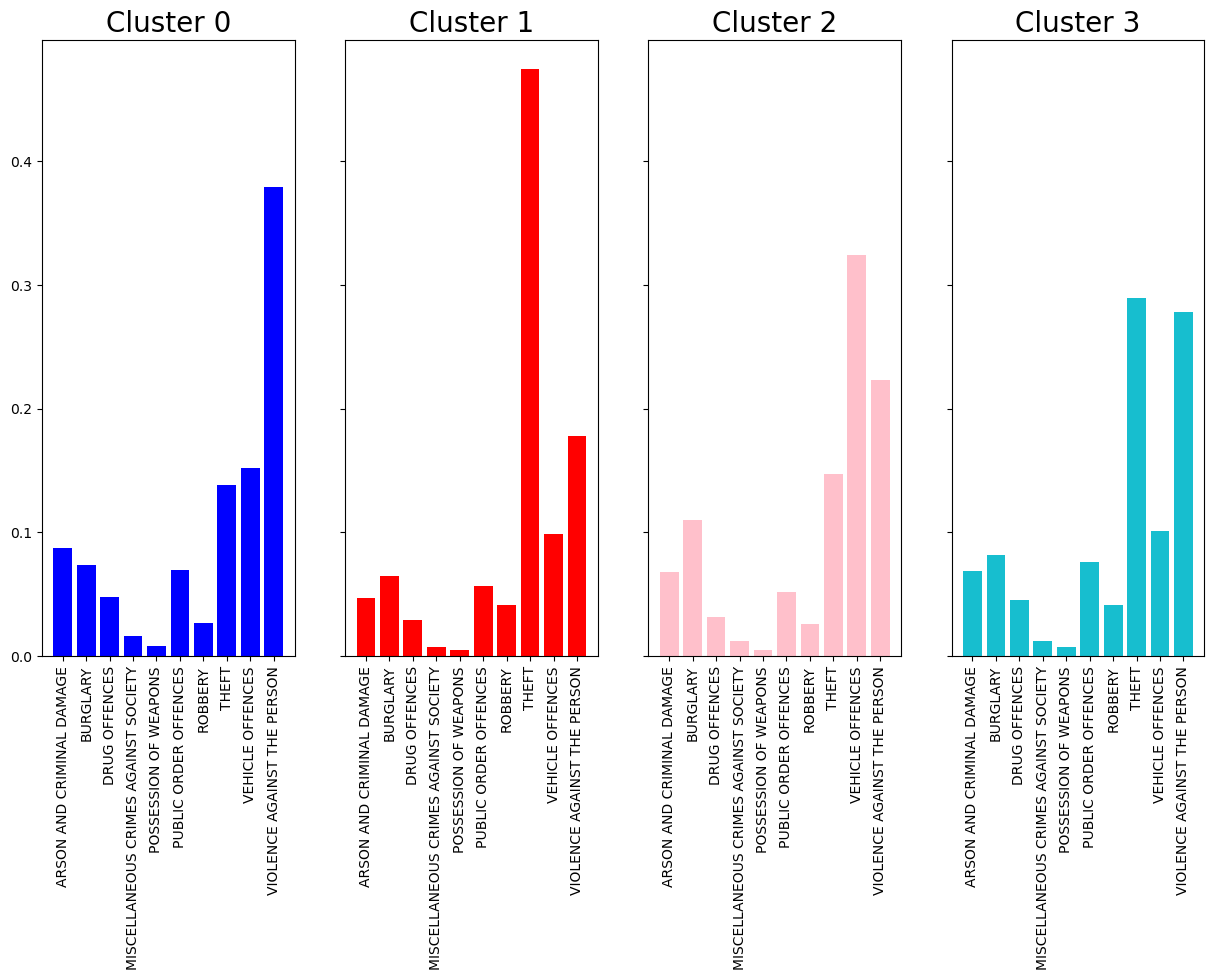

In [83]:
agglom_means_T.reset_index(inplace=True)

#get the colours
colors = ["blue", "red", "pink", "tab:cyan"]

#create subplots for each cluster
fig, ax = plt.subplots(1,4, figsize = (15,8), sharey = True, sharex = True)
#flatten the axis
axis = ax.flatten()

#going over each column
for i, col  in enumerate(agglom_means_T.columns):
    #ignore the index column
    if col != "index":
        ax = axis[i-1]
        #plot the bar chart
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"], color = colors[i-1] )
        #rotate the x-ticks
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        #set the title
        ax.set_title(f"Cluster {col}", fontsize = 20)

From this we can see that Cluster 0 on average has relatively high Violence against the person compared to the other clusters. Cluster 1 is dominated by incidences of Theft, much more so than any of the other clusters but has relatively low violence against the person. Cluster 2 is dominated by instances of vehicle offences and violence against the person and a relatively high burglarly rate, while cluster 3 has the second highest theft rate, while also having the second highest Violence against the person.

Based on this therefore we could assign labels such that:

- Cluster 0 - Violence against the person
- Cluster 1 - Theft
- Cluster 2 - Vehicle offences and Burglarly
- Cluster 3 - Theft and Violence against the person

This labelling suggests some degree of overlap between cluster 0, 1 and 3 potentially. We can explore this further by examining the sizes of the clusters and how these play out.

In [97]:
agglom_sizes = london_crime23.groupby("Aggl_clus").size()
agglom_sizes


Aggl_clus
0    2944
1     542
2     624
3     878
dtype: int64

From this we can see that cluster 1, 2 and 3 are much smaller than 0, which could suggest that this is not the optimal clustering.

Given that this is hierarchical clustering, we can aim to see how the model has behaved using the dendrogram. This shows the hierarchical structure in terms of how the model behaves and can be done using the following code:

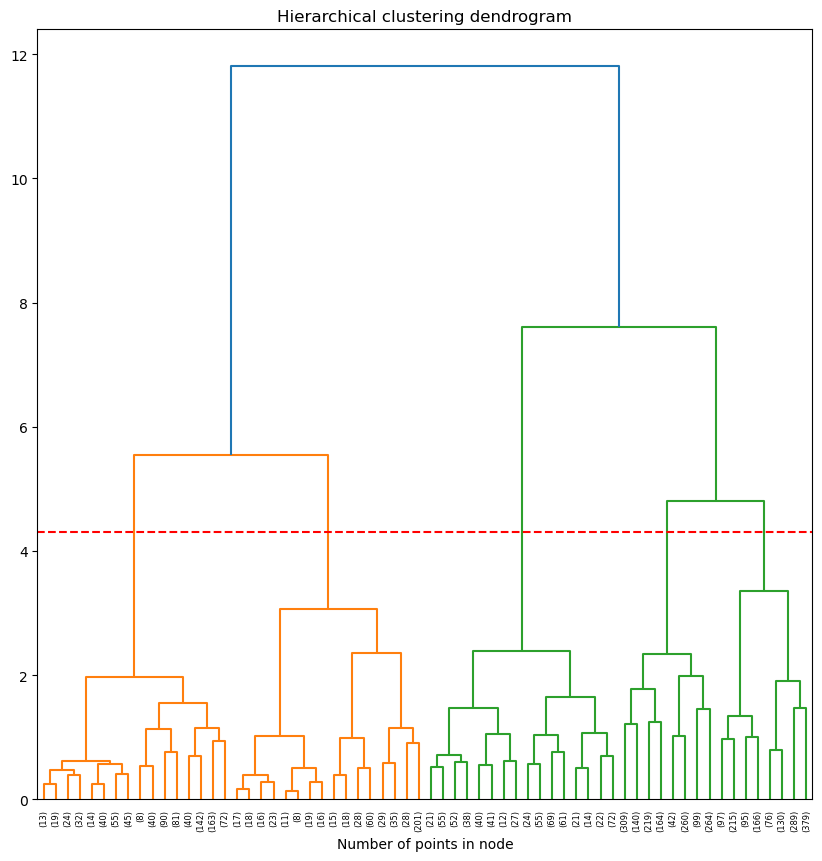

In [98]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                    counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.axhline(y = 4.3, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()

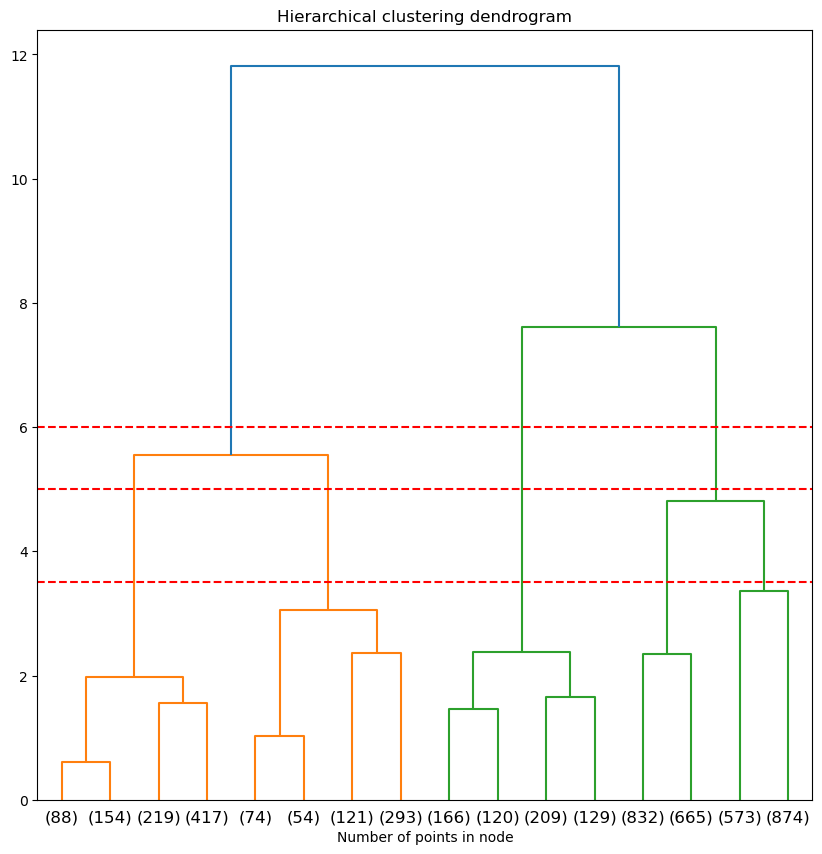

In [100]:
def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                    counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.axhline(y = 5, color = "r", linestyle = "--")
plt.axhline(y = 6, color = "r", linestyle = "--")
plt.axhline(y = 3.5, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()

In [102]:
#create the model that we want, setting the linkage to ward, the distance threshold to 4 and 
#set the number of clusters to none so that we can plot the dendrogram afterwards
model6 = AgglomerativeClustering(linkage="ward", distance_threshold = 6, n_clusters=None)
#fit the model to the data
model6.fit(crime_clus)
london_crime23["Aggl_clus_6"] = model6.labels_

model3_5 = AgglomerativeClustering(linkage="ward", distance_threshold = 3.5, n_clusters=None)
#fit the model to the data
model3_5.fit(crime_clus)
london_crime23["Aggl_clus_3_5"] = model3_5.labels_


Text(0.5, 1.0, 'Distance threshold 3.5 cluster')

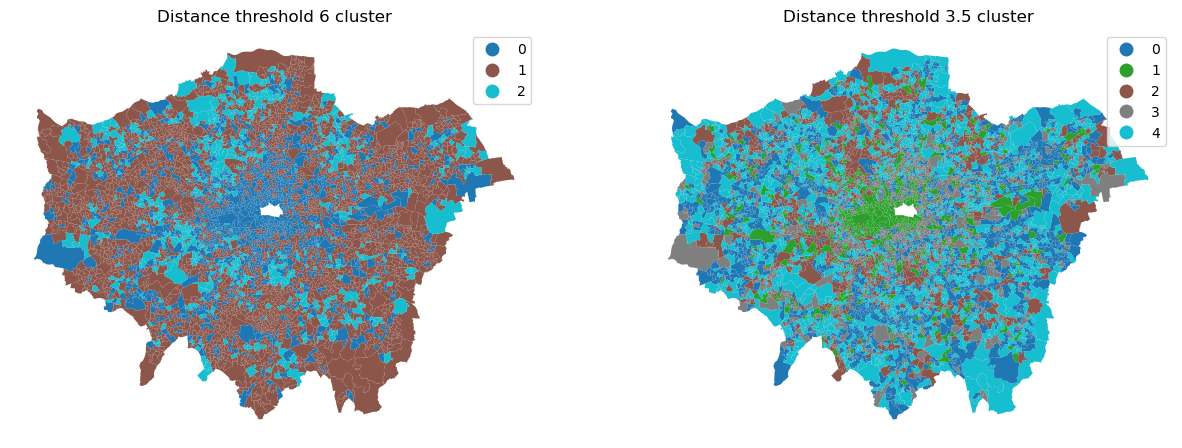

In [103]:
fig, ax = plt.subplots(1, 2, figsize = (15,30))

london_crime23.plot(column = "Aggl_clus_6", categorical = True, legend=True, ax=ax[0])
ax[0].set_axis_off()
ax[0].set_title("Distance threshold 6 cluster")

london_crime23.plot(column = "Aggl_clus_3_5", categorical = True, legend=True, ax=ax[1])
ax[1].set_axis_off()
ax[1].set_title("Distance threshold 3.5 cluster")

C:\Users\YU\AppData\Local\Temp\ipykernel_34576\295150740.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
C:\Users\YU\AppData\Local\Temp\ipykernel_34576\295150740.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
C:\Users\YU\AppData\Local\Temp\ipykernel_34576\295150740.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)


Text(0.5, 0.98, 'Clusters with distance threshold 6')

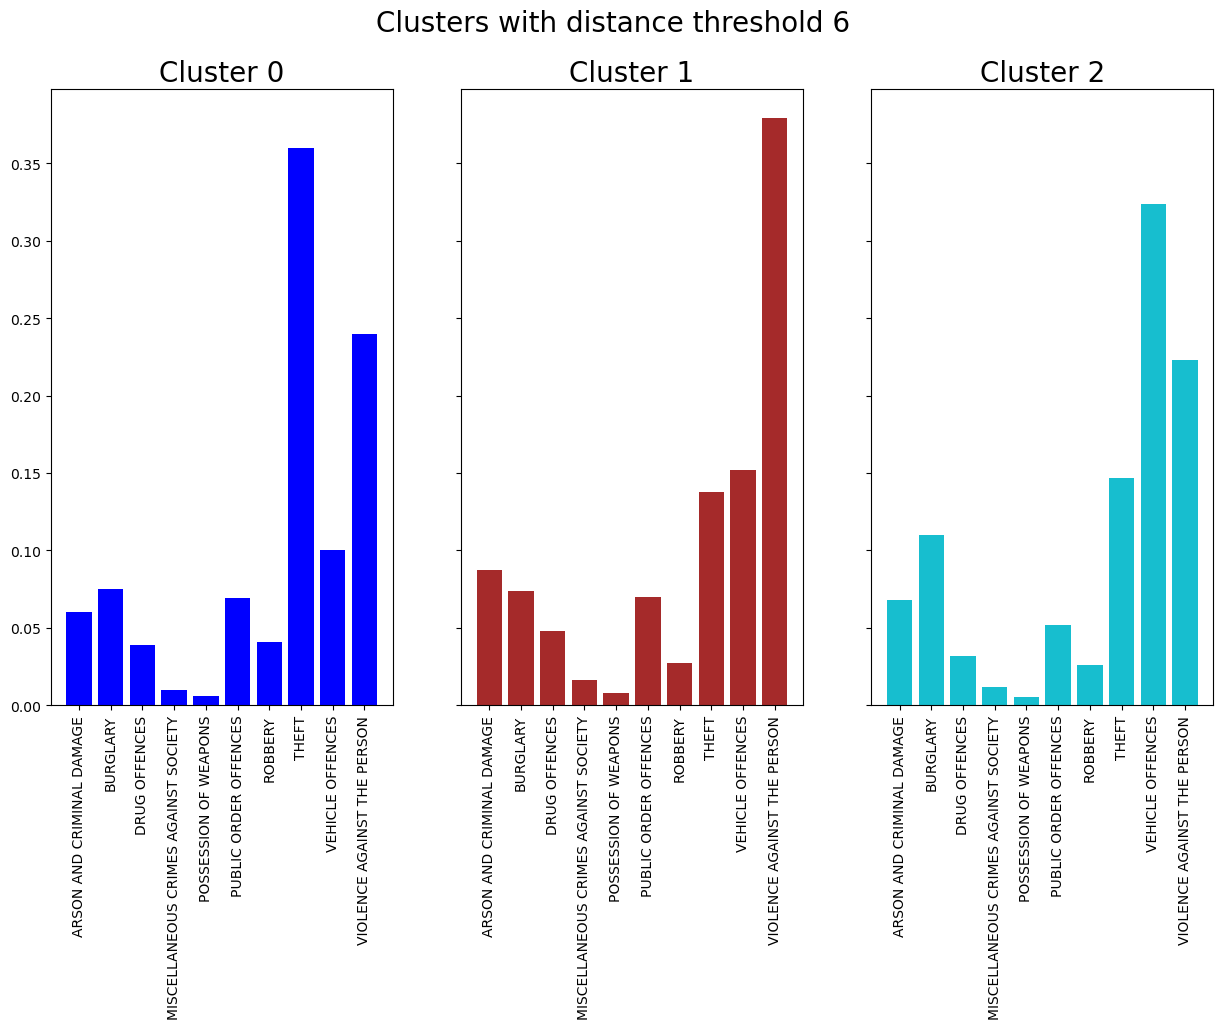

In [104]:
agglom_means =london_crime23.groupby("Aggl_clus_6")[to_plot].mean()
agglom_means_T = agglom_means.T.round(3)

agglom_means_T = pd.DataFrame(agglom_means_T)

agglom_means_T.reset_index(inplace=True)

colors = ["blue", "brown", "tab:cyan"]

fig, ax = plt.subplots(1,3, figsize = (15,8), sharey = True, sharex = True)
axis = ax.flatten()
for i, col  in enumerate(agglom_means_T.columns):
    if col != "index":
        ax = axis[i-1]
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"],  color = colors[i-1])
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 20)
        
plt.suptitle("Clusters with distance threshold 6", fontsize = 20)

In [105]:
agglom_sizes = london_crime23.groupby("Aggl_clus_6").size()
agglom_sizes

Aggl_clus_6
0    1420
1    2944
2     624
dtype: int64

C:\Users\YU\AppData\Local\Temp\ipykernel_34576\1357071760.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
C:\Users\YU\AppData\Local\Temp\ipykernel_34576\1357071760.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
C:\Users\YU\AppData\Local\Temp\ipykernel_34576\1357071760.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
C:\Users\YU\AppData\Local\Temp\ipykernel_34576\1357071760.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(

Text(0.5, 0.98, 'Clusters with distance threshold 3.5')

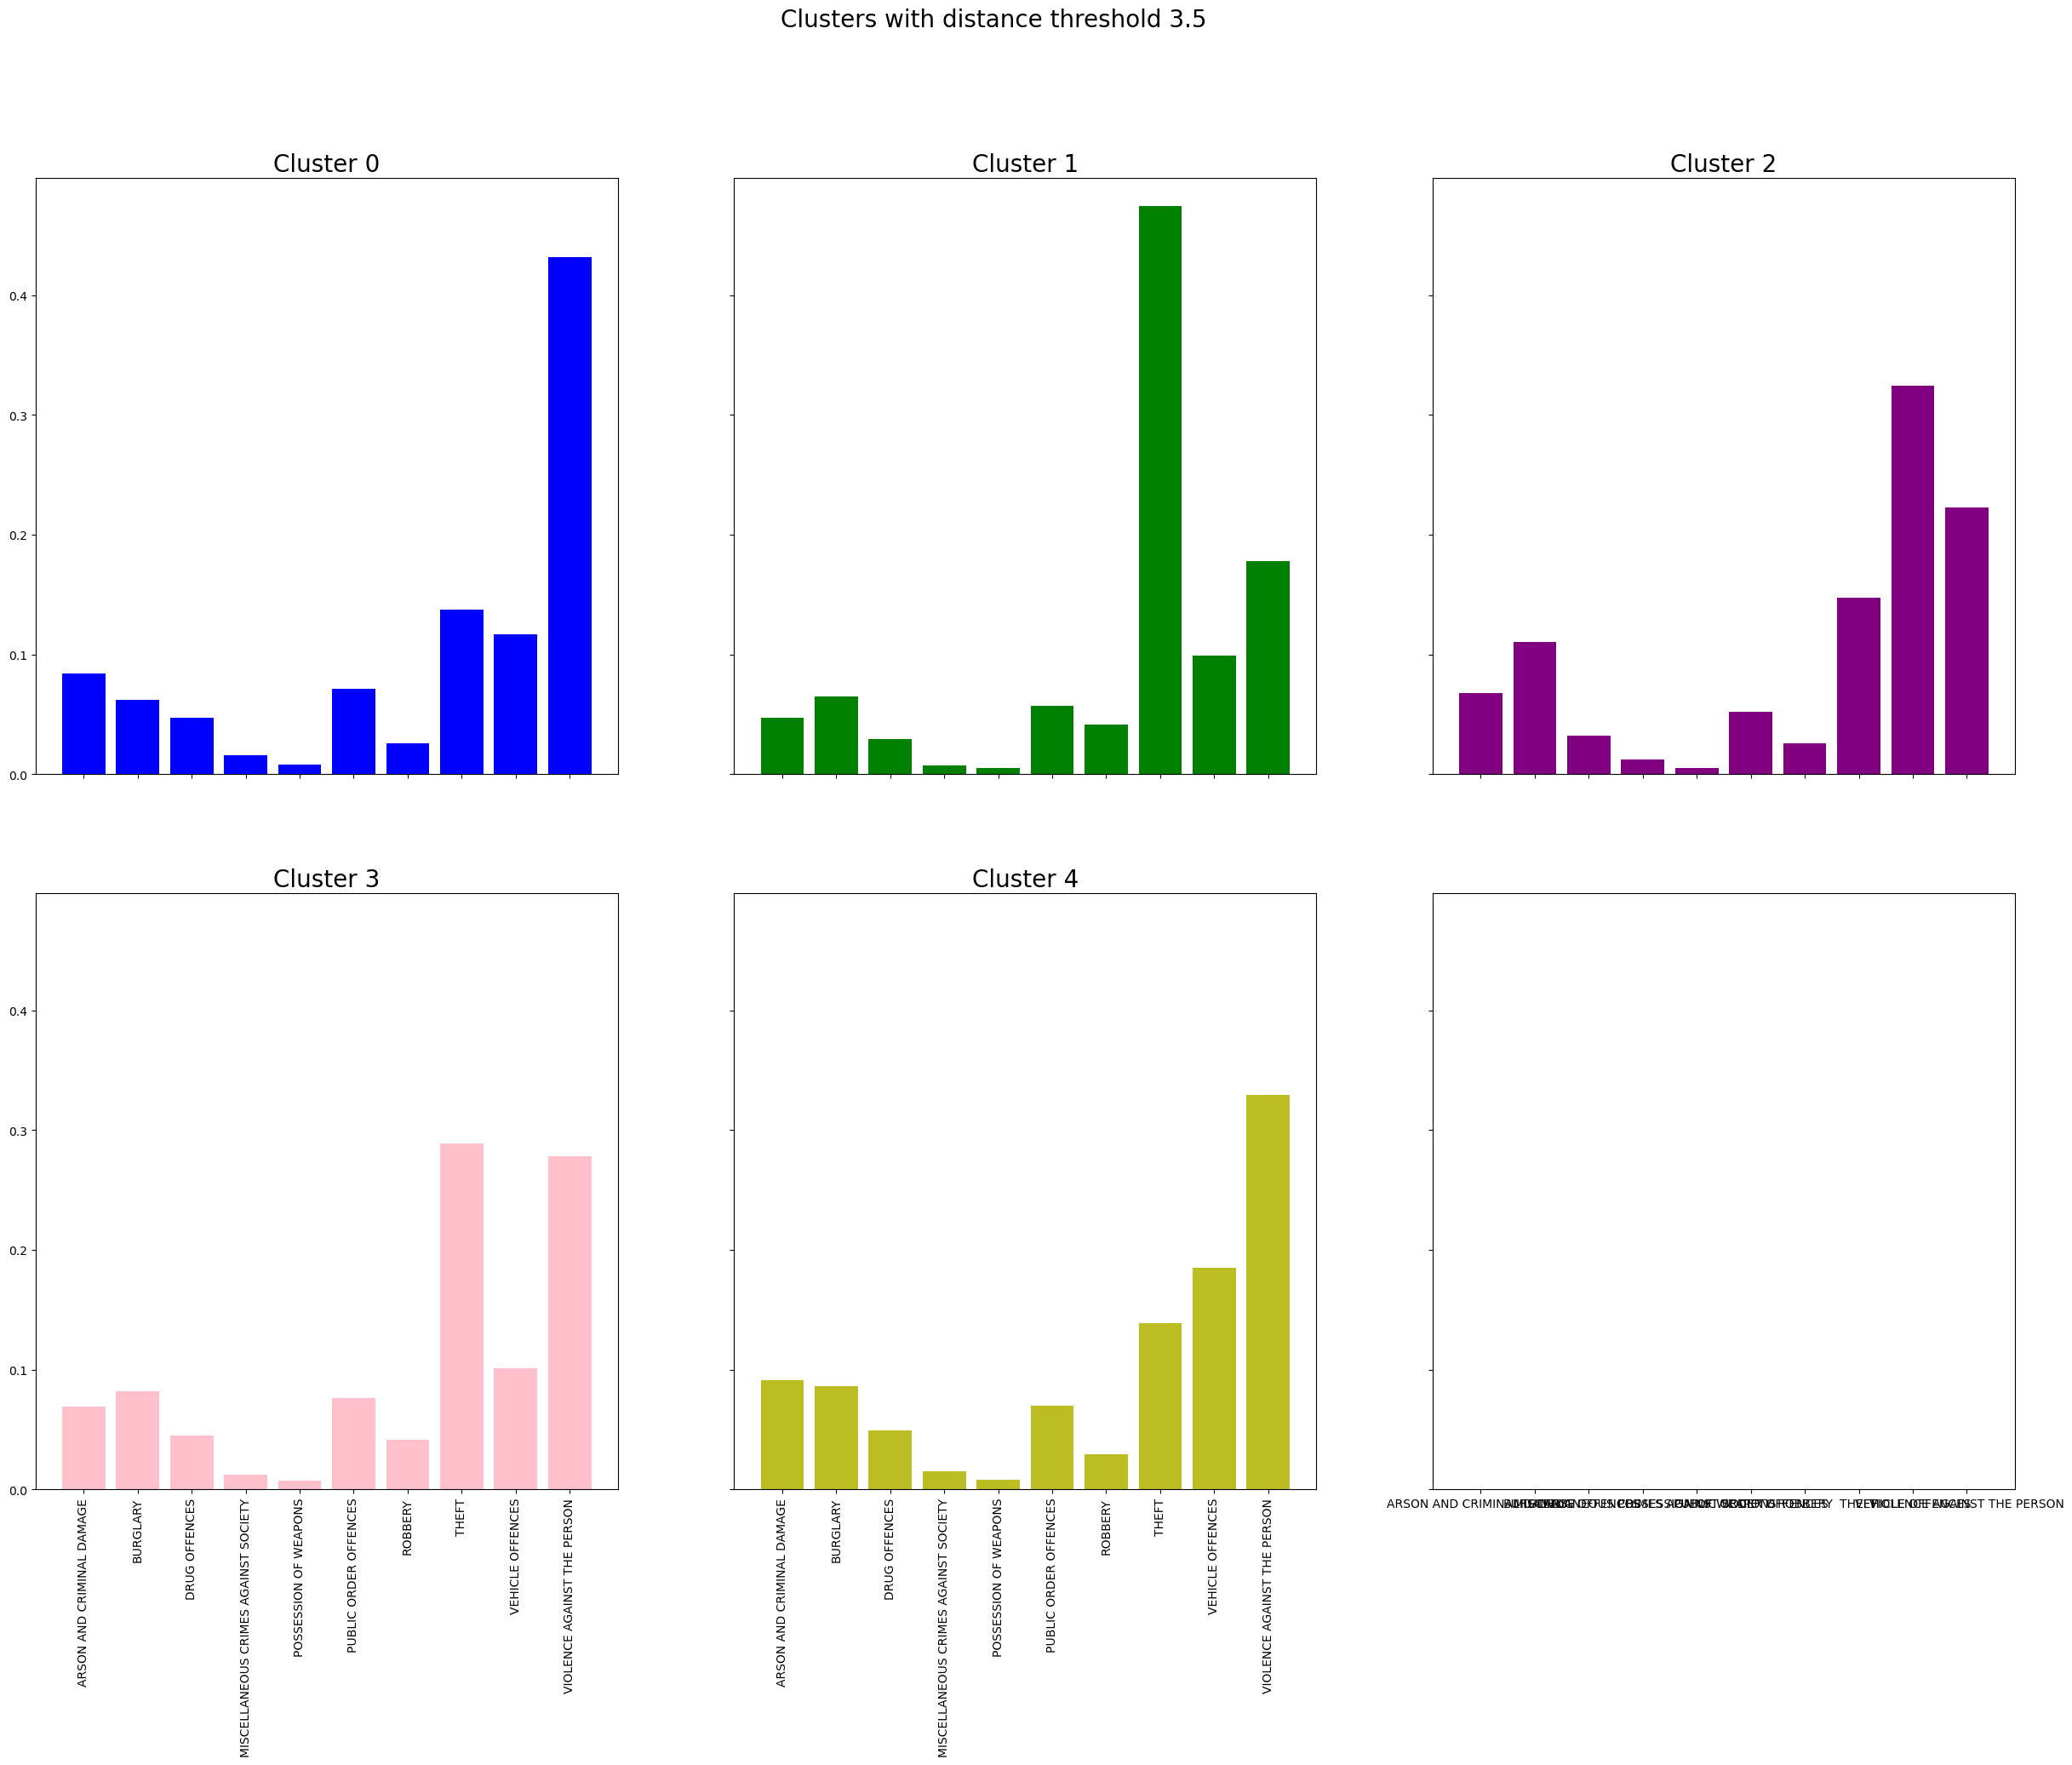

In [106]:
agglom_means =london_crime23.groupby("Aggl_clus_3_5")[to_plot].mean()
agglom_means_T = agglom_means.T.round(3)

agglom_means_T = pd.DataFrame(agglom_means_T)

agglom_means_T.reset_index(inplace=True)

colors = ["blue", "green", "purple", "pink", "tab:olive"]

fig, ax = plt.subplots(2,3, figsize = (30,20), sharey = True, sharex = True)
axis = ax.flatten()
for i, col  in enumerate(agglom_means_T.columns):
    if col != "index":
        ax = axis[i-1]
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"],
               color = colors[i-1])
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 20)
        
plt.suptitle("Clusters with distance threshold 3.5", fontsize = 20)

Text(0.5, 1.0, 'Clusters with distance threshold 3')

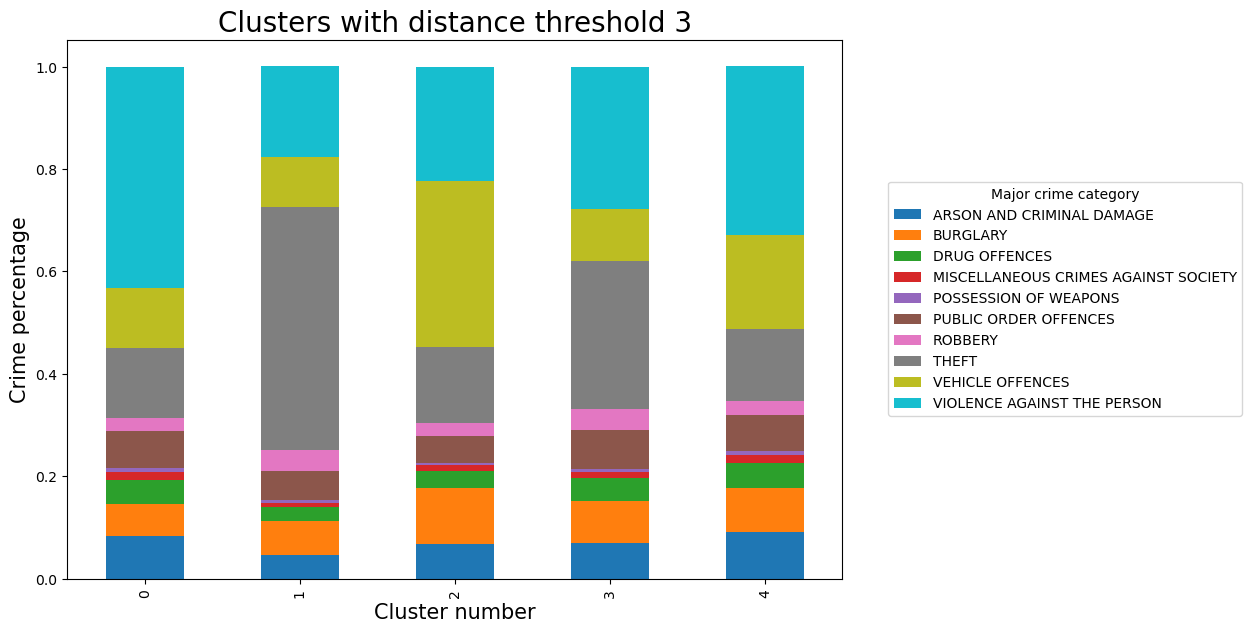

In [107]:
agglom_means =london_crime23.groupby("Aggl_clus_3_5")[to_plot].mean()
agglom_means_T = agglom_means.T.round(3)

agglom_means_T = pd.DataFrame(agglom_means_T)

agglom_means_T.reset_index(inplace=True)

agglom_means_T.set_index('index', inplace=True)
agglom_means_T.rename_axis(None,axis=1, inplace=True)
agglom_means_T.T

fig, ax = plt.subplots(figsize = (10,10))

agglom_plot = agglom_means_T.T.plot.bar(stacked=True, figsize=(10,7), ax=ax)
agglom_plot.legend(title='Major crime category', bbox_to_anchor=(1.05, 0.75), loc='upper left')
ax.set_xlabel("Cluster number", fontsize = 15)
ax.set_ylabel("Crime percentage", fontsize = 15)
ax.set_title("Clusters with distance threshold 3", fontsize = 20)

In [109]:
agglom_sizes = london_crime23.groupby("Aggl_clus_3_5").size()
agglom_sizes

Aggl_clus_3_5
0    1447
1     542
2     624
3     878
4    1497
dtype: int64

### Spatially constrained hierarchical clustering

In [110]:
#import the necessary packages
from libpysal import weights

#calculate the weights matrix
wr = weights.contiguity.Queen.from_dataframe(london_crime23)

C:\Users\YU\AppData\Local\Temp\ipykernel_34576\441967061.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wr = weights.contiguity.Queen.from_dataframe(london_crime23)


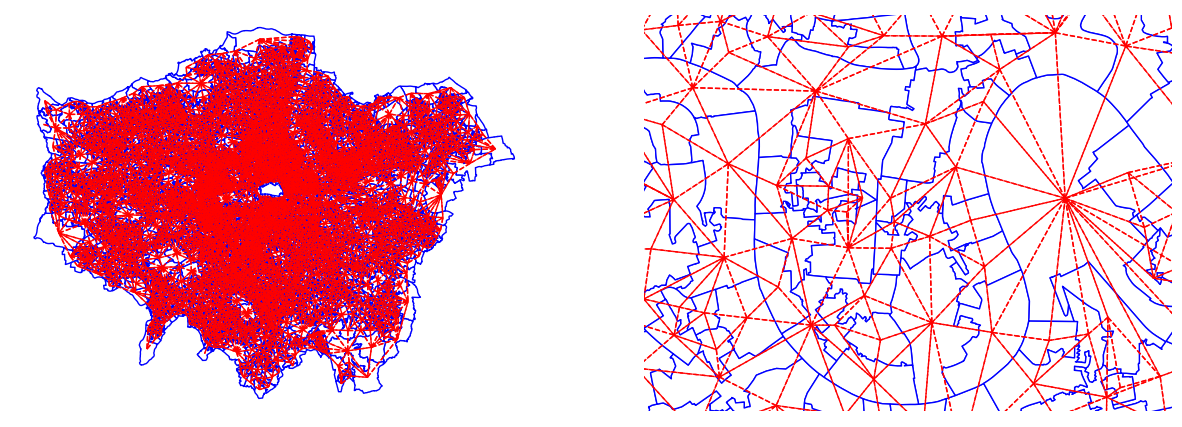

In [111]:
#looking at London
fig, ax = plt.subplots(1,2, figsize = (15,15))

london_crime23.plot(edgecolor = "blue", facecolor = "w", ax=ax[0])

wr.plot(london_crime23, ax=ax[0],
       edge_kws=dict(color="r", linestyle = "--", linewidth =1),
       node_kws=dict(marker=''))

ax[0].set_axis_off()

#Second plot looking into deepr depth
london_crime23.plot(edgecolor = "blue", facecolor = "w", ax=ax[1])

wr.plot(london_crime23, ax=ax[1],
       edge_kws=dict(color="r", linestyle = "--", linewidth =1),
       node_kws=dict(marker=''))
#zzoming ino Canary Wharf
ax[1].axis([536_000, 540_000, 178_000, 181_000])

ax[1].set_axis_off()

Now that we have the spatial weights matrix, which shows the connections that occur between LSOAs, the questions becomes to what extent are the variables that we used to cluster, spatially autocorrelated. Essentially, this measures how much crime percentages are related across areas that are geographically close (in our case geographic proximity is defined as sharing a border).

We can test for this globally using the Moran's I value, which measures the global degree of spatial autocorrelation. The greater this value, the greater the potential for values to spillover or be closely related to each other if they are close together. This can be implemented as:

In [112]:
#code from: https://geographicdata.science/book/notebooks/10_clustering_and_regionalization.html

#import Moran
from esda.moran import Moran

#extract the resutls for each column
mi_results = [Moran(london_crime23[col], wr) for col in to_plot]

#create a table based on this
#extract the variable, and results from the zipped list
table = pd.DataFrame([(to_plot, res.I, res.p_sim) \
                          for to_plot,res \
                          in zip(to_plot, mi_results)
                         ], 
                     #set the columns
                     columns=['Variable', "Moran's I", 'P-value'])\
              .set_index('Variable')
#set the index to the variable

#sort the tables values 
table.sort_values(by= ["Moran's I"], ascending=False)

Moran's I  P-value
Variable                                                
VEHICLE OFFENCES                       0.366190    0.001
THEFT                                  0.362307    0.001
VIOLENCE AGAINST THE PERSON            0.301234    0.001
ROBBERY                                0.233171    0.001
BURGLARY                               0.222762    0.001
DRUG OFFENCES                          0.169799    0.001
ARSON AND CRIMINAL DAMAGE              0.149179    0.001
PUBLIC ORDER OFFENCES                  0.096264    0.001
POSSESSION OF WEAPONS                  0.066430    0.001
MISCELLANEOUS CRIMES AGAINST SOCIETY   0.046896    0.002

In [138]:
#create the model with wards linkage
model = AgglomerativeClustering(linkage="ward", 
                                #define the connectivity
                                connectivity = wr.sparse,
                                #set the distance threshold
                                distance_threshold = 2.5, 
                                n_clusters=None)

#fit the model
model.fit(crime_clus)

AgglomerativeClustering(connectivity=<4988x4988 sparse matrix of type '<class 'numpy.float64'>'
	with 29792 stored elements in Compressed Sparse Row format>,
                        distance_threshold=2.5, n_clusters=None)

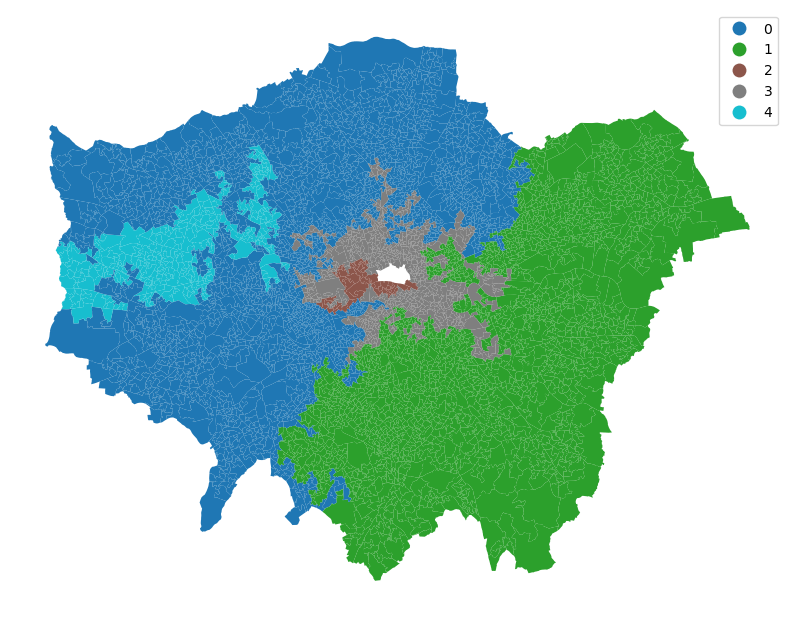

In [139]:
#extract labels
london_crime23["Aggl_clus_spa"] = model.labels_

#creating axis
fig, ax =plt.subplots(figsize = (10,10))

#plt the results
london_crime23.plot(column = "Aggl_clus_spa", categorical = True, legend=True, ax = ax)
ax.set_axis_off()

C:\Users\YU\AppData\Local\Temp\ipykernel_34576\2485007854.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=agglom_means_T["index"], rotation=90)
C:\Users\YU\AppData\Local\Temp\ipykernel_34576\2485007854.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=agglom_means_T["index"], rotation=90)
C:\Users\YU\AppData\Local\Temp\ipykernel_34576\2485007854.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=agglom_means_T["index"], rotation=90)
C:\Users\YU\AppData\Local\Temp\ipykernel_34576\2485007854.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ag

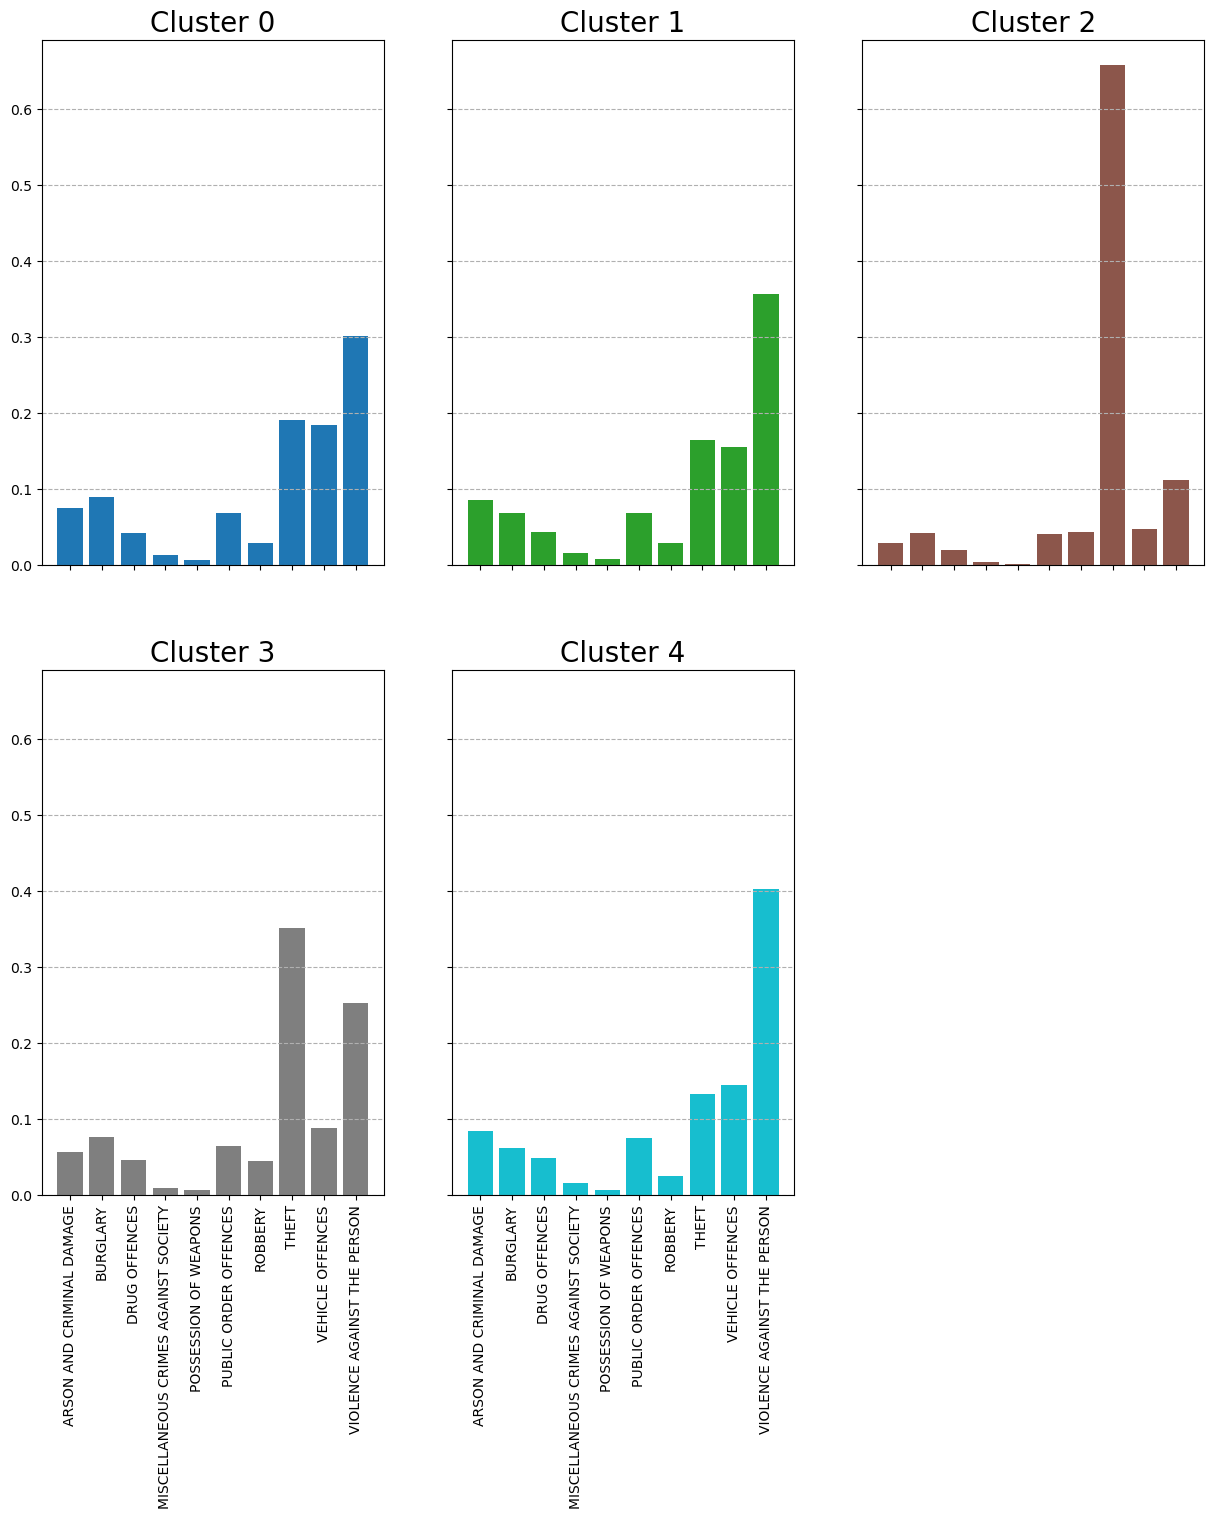

In [140]:
agglom_means =london_crime23.groupby("Aggl_clus_spa")[to_plot].mean()

agglom_means_T = pd.DataFrame(agglom_means.T.round(3))

agglom_means_T.reset_index(inplace=True)

colors = ["tab:blue", "tab:green", "tab:brown", "tab:grey", "tab:cyan"]

fig, ax = plt.subplots(2, 3, figsize=(15, 15), sharey=True, sharex=True)
axis = ax.flatten()
for i, col in enumerate(agglom_means_T.columns):
    if col != "index":
        ax = axis[i-1]
        ax.bar(height=agglom_means_T[col], x=agglom_means_T["index"], color=colors[i-1])
        ax.set_xticklabels(labels=agglom_means_T["index"], rotation=90)
        ax.set_title(f"Cluster {col}", fontsize=20)
        ax.grid(axis="y", zorder=0, linestyle="--")

# Remove any unused subplots
for j in range(i, len(axis)):
    axis[j].set_axis_off()

In [141]:
agglom_sizes = london_crime23.groupby("Aggl_clus_spa").size()
agglom_sizes

Aggl_clus_spa
0    2191
1    1819
2      46
3     612
4     320
dtype: int64

We can also, like before, create the dendrogram to see how it performs, but this is not the same as it was previously because we have now accounted for geographic proximity:

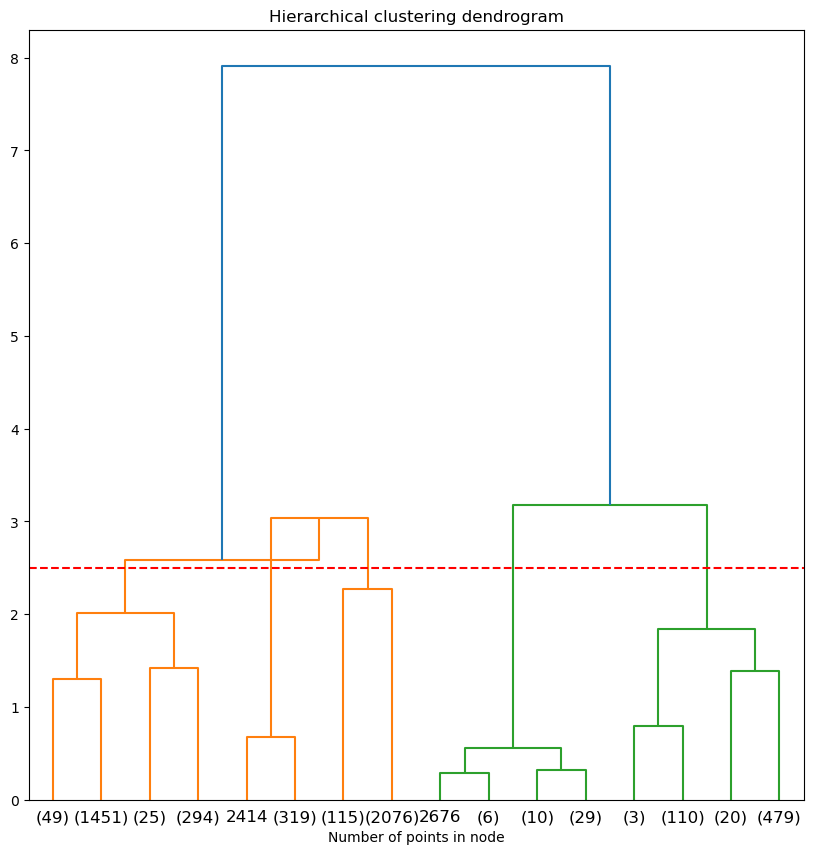

In [142]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
ax.set_xlabel("Number of points in node")
ax.axhline(y = 2.5, color = "r", linestyle = "--")
plt.show()


We can see from this that despite using wards linkage, we still have the issue of one dominant cluster of 0, which contains 2191 LSOAs.

Thus, accounting for geographical proximity in this was may not have produced the desired outcome that we want because the clusters are difficult to interpret both because of their crimes and geographic location. Consequently, alternative methods of spatial proximity could be used, or the percentage of crimes could be standardised such that we aren't looking at percentages but rather variance around the mean. We could also try different linkage or distance metrics to see how the algorithm performed and how the output changes. This therefore highlights the difficulties associated with clustering, in that to get the correct outcome a lot of different methodologies and factors can be considered and that ultimately, whether the result is correct or not, is subjective.